# Interactive Data Visualizer

This notebook creates an interactive data visualization tool using Plotly and ipywidgets. Run this with Voila to create a user-friendly GUI for exploring the dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import access_token
access_token.log_notebook_usage()

In [2]:
# Load the data
df = pd.read_csv('db.csv')

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Add a 'None' option for the color parameter
color_options = ['None'] + numerical_columns

print(f"Dataset loaded with {len(df)} rows and {len(df.columns)} columns")
print(f"Numerical columns available: {numerical_columns}")

Dataset loaded with 257 rows and 19 columns
Numerical columns available: ['No.', 'D', 'P', 'H', 'bp', 'mw', 'viscosity(mPa.s@25)', 'vis_temp', 'heat_of_vap', 'hov_temp', 'DN']


In [3]:
# Create widgets for the interactive visualization
x_dropdown = widgets.Dropdown(
    options=numerical_columns,
    description='X-axis:',
    value=numerical_columns[0] if numerical_columns else None,
    style={'description_width': 'initial'}
)

y_dropdown = widgets.Dropdown(
    options=numerical_columns,
    description='Y-axis:',
    value=numerical_columns[1] if len(numerical_columns) > 1 else numerical_columns[0] if numerical_columns else None,
    style={'description_width': 'initial'}
)

color_dropdown = widgets.Dropdown(
    options=color_options,
    description='Color by:',
    value='None',
    style={'description_width': 'initial'}
)

output = widgets.Output()

In [4]:
# Function to update the plot
def update_plot(*args):
    with output:
        clear_output(wait=True)
        
        # Get selected values
        x_col = x_dropdown.value
        y_col = y_dropdown.value
        color_col = color_dropdown.value if color_dropdown.value != 'None' else None
        
        # Filter out rows with missing values in the selected columns
        columns_to_check = [x_col, y_col]
        if color_col:
            columns_to_check.append(color_col)
            
        filtered_df = df.dropna(subset=columns_to_check)
        
        # Create the figure
        fig = go.Figure()
        
        if color_col:
            # Create a scatter plot with color mapping
            scatter = go.Scatter(
                x=filtered_df[x_col],
                y=filtered_df[y_col],
                mode='markers',
                marker=dict(
                    size=10,
                    color=filtered_df[color_col],
                    colorscale='RdYlBu',  # Red-Yellow-Blue color scale
                    showscale=True,
                    colorbar=dict(title=color_col)
                ),
                text=filtered_df['Name'],  # Show compound name on hover
                hovertemplate='<b>%{text}</b><br>' +
                              f'{x_col}: %{{x}}<br>' +
                              f'{y_col}: %{{y}}<br>' +
                              f'{color_col}: %{{marker.color}}<extra></extra>'
            )
        else:
            # Create a scatter plot without color mapping
            scatter = go.Scatter(
                x=filtered_df[x_col],
                y=filtered_df[y_col],
                mode='markers',
                marker=dict(size=10),
                text=filtered_df['Name'],  # Show compound name on hover
                hovertemplate='<b>%{text}</b><br>' +
                              f'{x_col}: %{{x}}<br>' +
                              f'{y_col}: %{{y}}<extra></extra>'
            )
        
        fig.add_trace(scatter)
        
        # Update layout
        fig.update_layout(
            title=f'Scatter Plot of {y_col} vs {x_col}' + (f' colored by {color_col}' if color_col else ''),
            xaxis_title=x_col,
            yaxis_title=y_col,
            height=600,
            width=800,
            template='plotly_white',
            hoverlabel=dict(bgcolor="white", font_size=12),
            margin=dict(l=50, r=50, t=50, b=50)
        )
        
        # Show the plot
        display(fig)
        
        # Show some statistics
        print(f"Displaying {len(filtered_df)} data points out of {len(df)} total records")
        if len(filtered_df) < len(df):
            print(f"{len(df) - len(filtered_df)} points were excluded due to missing values")

In [5]:
# Connect the widgets to the update function
x_dropdown.observe(update_plot, names='value')
y_dropdown.observe(update_plot, names='value')
color_dropdown.observe(update_plot, names='value')

# Create a UI layout
controls = widgets.HBox([x_dropdown, y_dropdown, color_dropdown])
ui = widgets.VBox([controls, output])

# Display the UI
display(ui)

# Initial plot update
update_plot()

Creating plots for 11 numeric columns
Total unique pairs: 55
Grid: 10 rows x 6 columns


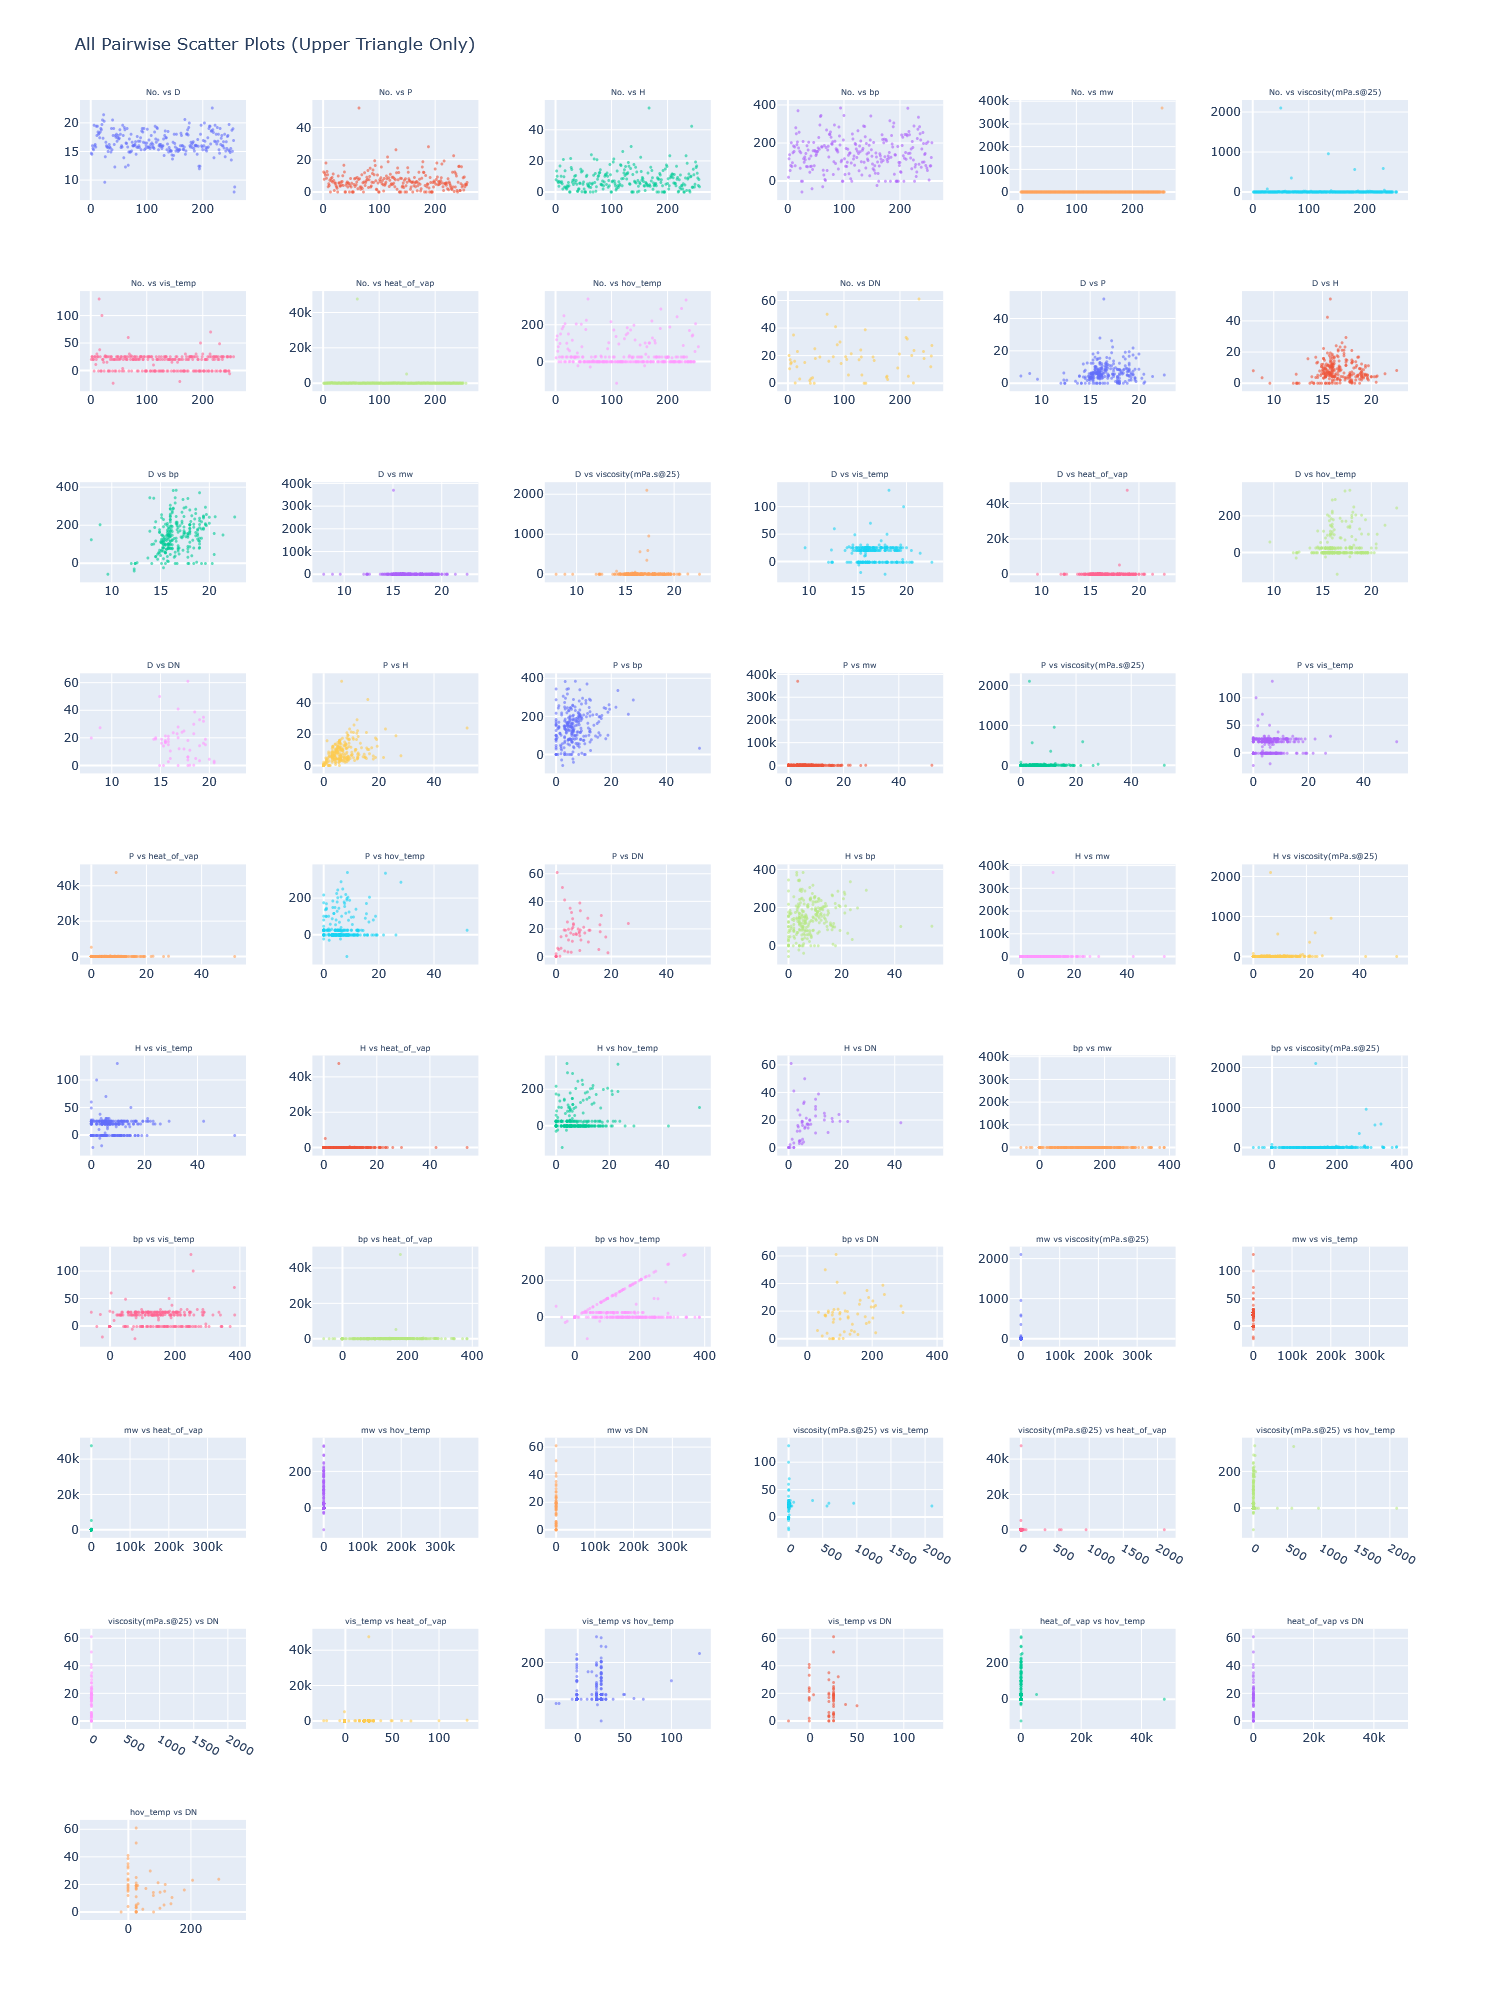

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools

# Use the numeric columns we found
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Creating plots for {len(numeric_cols)} numeric columns")

# Generate all unique pairs (upper triangle only - no duplicates)
pairs = list(itertools.combinations(numeric_cols, 2))
print(f"Total unique pairs: {len(pairs)}")

# Create subplot grid - use more columns to reduce rows
n_pairs = len(pairs)
subplot_cols = 6  # increased to 6 columns to reduce rows
subplot_rows = (n_pairs + subplot_cols - 1) // subplot_cols
print(f"Grid: {subplot_rows} rows x {subplot_cols} columns")

# Calculate appropriate spacing
max_v_spacing = 1.0 / (subplot_rows - 1) if subplot_rows > 1 else 0.1
max_h_spacing = 1.0 / (subplot_cols - 1) if subplot_cols > 1 else 0.1

v_spacing = min(0.05, max_v_spacing * 0.8)  # use 80% of max allowed
h_spacing = min(0.05, max_h_spacing * 0.8)

fig = make_subplots(
    rows=subplot_rows, 
    cols=subplot_cols,
    subplot_titles=[f"{pair[0]} vs {pair[1]}" for pair in pairs],
    horizontal_spacing=h_spacing,
    vertical_spacing=v_spacing
)

for idx, (x_col, y_col) in enumerate(pairs):
    row = idx // subplot_cols + 1
    col = idx % subplot_cols + 1
    
    fig.add_trace(
        go.Scatter(
            x=df[x_col], 
            y=df[y_col], 
            mode='markers', 
            name=f"{x_col} vs {y_col}",
            showlegend=False,
            marker=dict(size=3, opacity=0.6)  # smaller markers for more plots
        ),
        row=row, col=col
    )

# Update layout for better visibility
fig.update_layout(
    height=200 * subplot_rows,  # adjust height per row
    width=1400,  # wider to accommodate 6 columns
    title="All Pairwise Scatter Plots (Upper Triangle Only)",
    showlegend=False
)

# Update axes labels with smaller font
fig.update_xaxes(title_font_size=8)
fig.update_yaxes(title_font_size=8)

# Update subplot titles to smaller font
fig.update_annotations(font_size=8)

fig.show()

## How to use this visualization tool

1. Select the variable for the X-axis from the first dropdown
2. Select the variable for the Y-axis from the second dropdown
3. Optionally, select a third variable to use for coloring the data points
   - If "None" is selected, all points will have the same color
   - When a variable is selected, points will be colored using the RdYlBu (Red-Yellow-Blue) color scheme

Note: Data points with missing values in any of the selected variables will not be displayed in the plot.

In [7]:
import sys
import pkg_resources
import platform
import matplotlib
import ipywidgets

def print_environment_info():
    print(f"Python version: {sys.version}")
    print(f"\nPlatform: {platform.platform()}")
    print(f"\nInstalled packages:")
    installed_packages = [dist for dist in pkg_resources.working_set]
    for package in installed_packages:
        print(f"{package.key}=={package.version}")
    print(f"\nMatplotlib backend: {matplotlib.get_backend()}")
    print(f"IPywidgets version: {ipywidgets.__version__}")

if __name__ == "__main__":
    print_environment_info()

Python version: 3.12.10 | packaged by conda-forge | (main, Apr 10 2025, 22:21:13) [GCC 13.3.0]

Platform: Linux-6.8.0-64-generic-x86_64-with-glibc2.39

Installed packages:
brotli==1.1.0
griddataformats==1.0.2
markupsafe==3.0.2
pyjwt==2.10.1
pysocks==1.7.1
pyyaml==6.0.2
send2trash==1.8.3
unidecode==1.4.0
aiofiles==24.1.0
alembic==1.15.2
amqp==5.3.1
annotated-types==0.7.0
anyio==4.10.0
anytree==2.13.0
archspec==0.2.5
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
ase==3.22.1
asteval==1.0.6
asttokens==2.4.1
async-generator==1.10
async-lru==2.0.5
async-property==0.2.2
attrs==25.3.0
babel==2.17.0
beautifulsoup4==4.12.3
billiard==4.2.1
bitarray==3.7.1
bleach==6.2.0
blinker==1.9.0
boltons==24.0.0
bqplot==0.12.45
cached-property==1.5.2
cachetools==6.2.0
celery==5.5.3
certifi==2025.1.31
certipy==0.2.2
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
click==8.2.1
click-default-group==1.2.4
click-didyoumean==0.3.1
click-plugins==1.1.1.2
click-repl==0.3.0
cloudpickle==3.1.1
col

/tmp/ipykernel_3612/1528670618.py:2: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.

